  # Régression Multivariée (x1, x2) - Gradient Descent

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
dataset=pd.read_csv("advertising.csv")

In [4]:
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset.Sales.values.reshape(200,1)

In [5]:
# Verification des dimensions
print(x.shape)
print(y.shape)


(200, 3)
(200, 1)


In [6]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)

(200, 4)


In [7]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [8]:
X_train = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
X_test = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

In [9]:
np.random.seed(0)
theta = np.random.randn(4,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [11]:
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.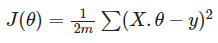


In [13]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [14]:
cost_function(X_train, y_train, theta)

52731.58911178677

## 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la MSE. Ensuite on utilise cette fonction dans la descente de gradient:
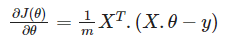

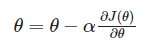

In [17]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [18]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [20]:
n_iterations = 2000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

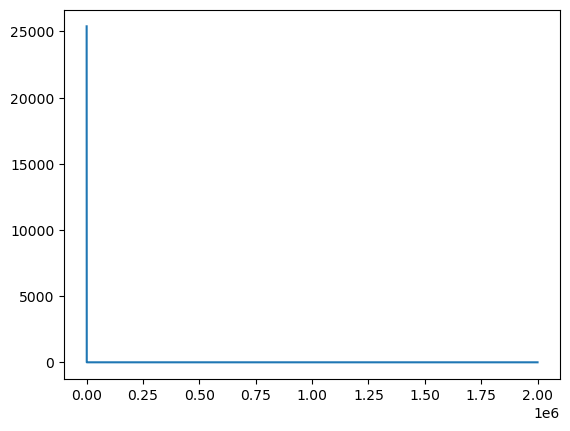

In [22]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [23]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

theta_final

array([[0.05494562],
       [0.1024872 ],
       [0.00543518],
       [4.55897433]])

In [24]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)
predictions

array([[17.0577106 ],
       [20.47150889],
       [23.78773388],
       [ 9.22928593],
       [21.70275965],
       [12.5588764 ],
       [21.11820962],
       [ 8.59511416],
       [17.19853748],
       [16.65712252],
       [ 8.82290384],
       [ 8.39252008],
       [18.253082  ],
       [ 7.97113863],
       [12.58368721],
       [14.90143733],
       [ 8.06498417],
       [17.88136007],
       [10.95351303],
       [20.48124938],
       [20.88262103],
       [12.65492953],
       [10.84182065],
       [22.47857668],
       [ 9.3082447 ],
       [ 7.81985227],
       [20.8805228 ],
       [13.75440237],
       [10.70035251],
       [ 7.81958323],
       [15.91880169],
       [10.56166261],
       [20.87663659],
       [10.45215114],
       [21.60788353],
       [21.19113829],
       [12.07594515],
       [22.8839508 ],
       [12.53451275],
       [ 6.34646665]])

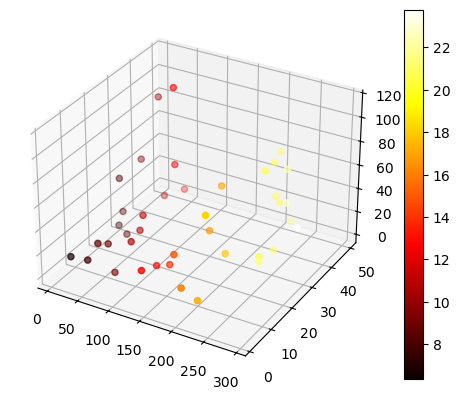

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_test['TV']
y = x_test['Radio']
z = x_test['Newspaper']
c = predictions

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression polynomiale. Le coefficient de détermination se sit!ue entre 0 et 1. Plus il est proche de 1, plus la régression polynomiale est en adéquation avec les données collectées.

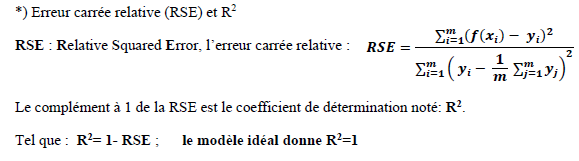

In [28]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [29]:
coef_determination(y_test, predictions)

0.9062568075912256